In [1]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.model_selection import train_test_split
from src.optimizers import *
from src.activation_functions import * 
from src.utils import *
from src.model_regularization import *
from src.layer import *
from src.batch_normalization import *
np.random.seed(0)


In [389]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

df = pd.read_csv("../ML_project/data/Monk_2/monks-2.train", names=[0,1,2,3,4,5,6,"index"], delimiter= " ")
# df = pd.read_csv("../ML_project/data/Monk_2/monks-2.train",
#                  names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
df.set_index("index", inplace=True)
y = df.iloc[:, 0]  # First column as target
X = df.iloc[:, 1:]  # All other columns as features
for i in range(1, X.shape[1]):
    X.iloc[:, i] = X.iloc[:, i].astype('float64')
    X.iloc[:, i] = ((X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
        np.std(X.iloc[:, i]))
X.head()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_20064\565654848.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_4      1.0
data_7      1.0
data_9      1.0
data_10     1.0
data_11     1.0
           ... 
data_421    3.0
data_422    3.0
data_425    3.0
data_427    3.0
data_432    3.0
Name: 2, Length: 169, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = X.iloc[:, i].astype('float64')
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_20064\565654848.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_4      1.0
data_7      1.0
data_9      1.0
data_10     1.0
data_11     1.0
           ... 
data_421    2.0
data_422    2.0
data_425    2.0
data_427    2.0
data_432    2.0
Name: 3, Length: 169, dtype: float64' has dtype incompatible with int64, please explicitl

,1,2,3,4,5,6
index,,,,,,
data_4,1,-1.233337,-1.017912,-1.264063,-0.432844,0.994100
data_7,1,-1.233337,-1.017912,-1.264063,1.395921,-1.005935
data_9,1,-1.233337,-1.017912,-0.050275,-1.347226,-1.005935
data_10,1,-1.233337,-1.017912,-0.050275,-1.347226,0.994100
data_11,1,-1.233337,-1.017912,-0.050275,-0.432844,-1.005935


In [386]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

test_data = pd.read_csv("../ML_project/data/Monk_2/monks-2.test",
names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
test_data.set_index("index", inplace=True)
# test_data.head()
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
for i in range(1, X_test.shape[1]):
    X_test.iloc[:, i] = ((X_test.iloc[:, i] - np.mean(X_test.iloc[:, i])) / 
                         np.std(X_test.iloc[:, i]))

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_20064\4038239897.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.224745
data_2     -1.224745
data_3     -1.224745
data_4     -1.224745
data_5     -1.224745
              ...   
data_428    1.224745
data_429    1.224745
data_430    1.224745
data_431    1.224745
data_432    1.224745
Name: 2, Length: 432, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.iloc[:, i] = ((X_test.iloc[:, i].astype('float64') - np.mean(X_test.iloc[:, i].astype('float64'))) /
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_20064\4038239897.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.0
data_2     -1.0
data_3     -1.0
data_4     -1.0
data_5     -1.0
           ... 
data_428    1.0
data_429    1.0
data_430    1.0
da

In [382]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)

Training Features Shape: (135, 6)
Validation Features Shape: (34, 6)
Training Target Shape: (135,)
Validation Target Shape: (34,)


In [353]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped * y_true, axis=1) 

        negative_log_likelihoods = np.log(correct_confidence)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


class Activation_Softmax_Loss_CategoricalCrossentropy():

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()


    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)

        # Set the output
        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1

        self.dinputs = self.dinputs / samples

class MSE:
    def __init__(self):
        self.dinputs = None
        self.output = None
        
    def forward(self, y_pred, y_true):
        # Remove the shape condition - always calculate loss
        self.output = np.mean((y_pred - y_true)**2)
        return self.output
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        self.dinputs = 2 * (dvalues - y_true) / samples

In [354]:
class NN:
    def __init__(self, l1, l2, input_size, hidden_sizes, output_size, 
                 hidden_activations=None, dropout_rates=None, 
                 use_batch_norm=None, output_activation=Activation_Sigmoid()):
        self.layers = []
        prev_size = input_size

        # Default activations to ReLU
        if hidden_activations is None:
            hidden_activations = [Activation_ReLU() for _ in hidden_sizes]

        # Default dropout rates to 0
        if dropout_rates is None:
            dropout_rates = [0.0] * len(hidden_sizes)

        # Default batch_norm to False for all layers
        if use_batch_norm is None:
            use_batch_norm = [False] * len(hidden_sizes)
        else:
            assert len(use_batch_norm) == len(hidden_sizes), \
                "use_batch_norm must have the same length as hidden_sizes"

        # Create hidden layers
        for size, activation, rate, bn_flag in zip(hidden_sizes, hidden_activations, 
                                                 dropout_rates, use_batch_norm):
            # Add dense layer
            self.layers.append(Layer_Dense(prev_size, size, l1=l1, l2=l2))
            
            # Add batch normalization if specified
            if bn_flag:
                self.layers.append(BatchNormalization())
            
            # Add activation
            self.layers.append(activation())
            
            # Add dropout if rate > 0
            if rate > 0:
                self.layers.append(Dropout(rate))
            
            prev_size = size

        # Output layer
        self.layers.append(Layer_Dense(prev_size, output_size))
        # self.layers.append(output_activation)

    def forward(self, inputs, training=True):
        for layer in self.layers:
            # Pass training flag to relevant layers
            if isinstance(layer, (Dropout, BatchNormalization)):
                layer.forward(inputs, training=training)
            else:
                layer.forward(inputs)
            inputs = layer.output
        self.output = inputs
        return self.output

In [355]:
def accuracy(target, output):
    predictions = np.round(output.squeeze())
    return np.mean(predictions == target.squeeze()) * 100

In [356]:
# def train_and_evaluate(learning_rate, l1, l2, dropout_rate, batch_size, hidden_sizes, activation, n_epochs=500):
#     # Initialize components
#     model = NN(
#         l1=l1,
#         l2=l2,
#         input_size=6,
#         hidden_sizes=hidden_sizes,
#         output_size=1,
#         hidden_activations=[activation],
#         dropout_rates=[dropout_rate],
#         output_activation=Activation_Sigmoid()
#     )
    
#     loss_function = MSE()
#     optimizer = Optimizer_Adam(learning_rate=learning_rate, decay=1e-3)
#     early_stopping = EarlyStopping(
#         patience=20,
#         min_delta_loss=0.0001,
#         min_delta_accuracy=0.0001
#     )

#     train_losses = []
#     train_accuracies = []
#     val_losses = []
#     val_accuracies = []

#     for epoch in range(n_epochs):
#         # Training phase
#         batch_losses = []
#         batch_accuracies = []
        
#         for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
#             # Forward pass
#             model.forward(X_batch, training=True)
            
#             # Calculate loss and accuracy
#             loss = loss_function.forward(model.output, y_batch)
#             predictions = np.round(model.output.squeeze())
#             accuracy = np.mean(predictions == y_batch.squeeze())

#             # Backward pass
#             loss_function.backward(model.output, y_batch)
#             dvalues = loss_function.dinputs
            
#             # Gradient propagation
#             for layer in reversed(model.layers):
#                 layer.backward(dvalues)
#                 dvalues = layer.dinputs
#                 # Convert pandas objects to numpy arrays
#                 if isinstance(dvalues, (pd.DataFrame, pd.Series)):
#                     dvalues = dvalues.values

#             # Parameter update
#             optimizer.pre_update_params()
#             for layer in model.layers:
#                 if isinstance(layer, Layer_Dense):
#                     optimizer.update_params(layer)
#             optimizer.post_update_params()
            
#             batch_losses.append(loss)
#             batch_accuracies.append(accuracy)

#         # Store epoch metrics
#         epoch_loss = np.mean(batch_losses)
#         epoch_acc = np.mean(batch_accuracies)
#         train_losses.append(epoch_loss)
#         train_accuracies.append(epoch_acc)

#         # Validation phase
#         model.forward(X_val.values if isinstance(X_val, pd.DataFrame) else X_val, 
#                      training=False)
#         val_loss = loss_function.forward(model.output, 
#                                         y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val)
#         val_predictions = np.round(model.output.squeeze())
#         val_accuracy = np.mean(val_predictions == y_val.squeeze())
        
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#         # Early stopping check
#         early_stopping.on_epoch_end(val_loss, val_accuracy, model, epoch)
#         if early_stopping.stop_training:
#             print(f"\nEarly stopping triggered at epoch {epoch}! Restoring best weights from epoch {early_stopping.best_epoch}")
#             break

#         # Progress reporting
#         if epoch % 10 == 0:  # More frequent updates
#             print(f"Epoch {epoch}: ", end="")
#             print(f"Train Loss: {epoch_loss}, Acc: {epoch_acc*100} % | ", end="")
#             print(f"Val Loss: {val_loss}, Acc: {val_accuracy*100} % ")

#     # Restore best weights if any improvement occurred
#     if early_stopping.best_weights is not None:
#         print("THIS WILL NEVER BE PRINTED")
#         for i, layer in enumerate(model.layers):
#             if isinstance(layer, Layer_Dense):
#                 layer.weights = early_stopping.best_weights[i][0].copy()
#                 layer.bias = early_stopping.best_weights[i][1].copy()

#     # Final validation with restored weights
#     model.forward(X_val.values if isinstance(X_val, pd.DataFrame) else X_val, training=False)
#     final_val_loss = loss_function.forward(model.output, y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val)
#     final_val_accuracy = np.mean(np.round(model.output.squeeze()) == y_val.squeeze())

#     return final_val_loss, final_val_accuracy

In [357]:
# hyperparameter_grid = {
#     'learning_rate': [0.001, 0.003, 0.0003],
#     'l1': [0.0, 1e-5],
#     'l2': [0.0, 1e-4, 1e-3],
#     'dropout_rate': [0, 0.2, 0.5],
#     'batch_size': [1, 4, 16, 32],
#     'hidden_sizes': [[10], [20], [10, 10], [20, 20]],
#     'activation': [Activation_Leaky_ReLU, Activation_Tanh]
# }

# hyperparameter_grid = {
#     'learning_rate': [0.1],
#     'l1': [0.0, 1e-5],
#     'l2': [0.0, 1e-4],
#     'dropout_rate': [0.1,],
#     'batch_size': [1,],
#     'activation': [Activation_Sigmoid]
# }

In [358]:
# print(len(val_accuracies))

In [359]:
# # Initialize variables to store the best hyperparameters and performance
# best_hyperparams = []
# best_performance = (-np.inf, -np.inf)  # Assuming we are maximizing validation accuracy

# # Iterate over all combinations of hyperparameters
# for params in product(*hyperparameter_grid.values()):
#     # Unpack the hyperparameters
#     learning_rate, l1, l2, dropout_rate, batch_size, hidden_sizes, activation = params
#     # Train and evaluate the model
#     val_accuracy = train_and_evaluate(learning_rate, l1, l2, dropout_rate, batch_size, hidden_sizes, activation)
#     # Update the best hyperparameters if the current model is better
#     if val_accuracy[1] > best_performance[1]:
#         best_hyperparams.clear()
#         best_performance = val_accuracy
#         best_hyperparams.append({
#             'learning_rate': learning_rate,
#             'l1': l1,
#             'l2': l2,
#             'dropout_rate': dropout_rate,
#             'batch_size': batch_size,
#             'hidden_sizes': hidden_sizes,
#             'activation': activation
#         })
#     elif val_accuracy[1] == 1.0:
#         best_hyperparams.append({
#             'learning_rate': learning_rate,
#             'l1': l1,
#             'l2': l2,
#             'dropout_rate': dropout_rate,
#             'batch_size': batch_size,
#             "hidden_sizes": hidden_sizes,
#             'activation': activation
#         })

# # Print the best hyperparameters and performance
# print("Best Hyperparameters:", best_hyperparams)
# print("Best Validation Accuracy:", best_performance)

In [360]:
# print(best_hyperparams)

In [361]:
# test_accuracies = []

In [362]:
early_stopping = EarlyStopping(
        patience=10,
        min_delta_loss=0.0001,
        min_delta_accuracy=0.000
    )


In [454]:
model = NN(l1=0.01,
    l2=0.1,
    input_size=6,
    hidden_sizes=[30, 30],
    output_size=1,
    hidden_activations=[Activation_Leaky_ReLU, Activation_Tanh],
    dropout_rates=[0.1, 0.1], 
    use_batch_norm=[False, True],
)

batch_size = 10000
learning_rate =0.003
n_epochs = 300

Data shapes:
X_train: (135, 6), y_train: (135,)
Sample prediction: [[0.]]
Initial loss: 0.0
Epoch 0: Train Loss: 0.47800971792100333, Acc: 60.0 % | Val Loss: 0.5355316763386914, Acc: 44.11764705882353 % 
Epoch 10: Train Loss: 0.2772459966974147, Acc: 68.14814814814815 % | Val Loss: 0.5187172699185599, Acc: 44.11764705882353 % 
Epoch 20: Train Loss: 0.25602670915890646, Acc: 68.88888888888889 % | Val Loss: 0.495514423191839, Acc: 44.11764705882353 % 
Epoch 30: Train Loss: 0.23670887251202327, Acc: 69.62962962962963 % | Val Loss: 0.47381264455849686, Acc: 44.11764705882353 % 
Epoch 40: Train Loss: 0.17121254634517724, Acc: 73.33333333333333 % | Val Loss: 0.4490479678410329, Acc: 44.11764705882353 % 
Epoch 50: Train Loss: 0.1612813942616483, Acc: 75.55555555555556 % | Val Loss: 0.4603668063785626, Acc: 44.11764705882353 % 
Epoch 60: Train Loss: 0.10579636312969168, Acc: 88.88888888888889 % | Val Loss: 0.43707469032668306, Acc: 44.11764705882353 % 
Epoch 70: Train Loss: 0.0976887861691308,

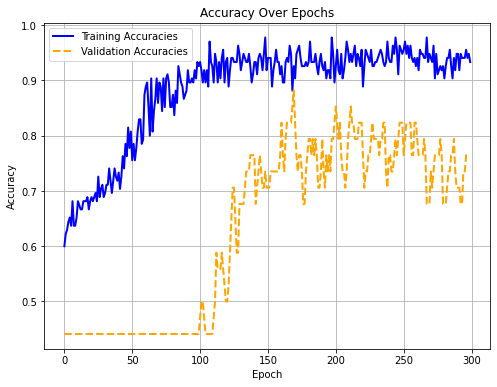

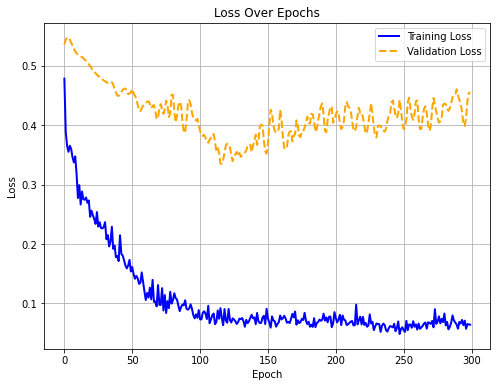

Test Accuracy: 0.8148


In [455]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

loss_function = MSE()
optimizer = Optimizer_Adam(learning_rate=learning_rate, decay=1e-3)
# Before training loop:
print("Data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Sample prediction: {model.forward(X_train[:1])}")  # Should output ~0.5
print(f"Initial loss: {loss_function.forward(model.output, y_train[:1].squeeze())}")
# Training loop
for epoch in range(n_epochs):
    batch_losses = []
    batch_accuracies = []
    
    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
        # Forward pass
        model.forward(X_batch, training=True)
        
        # Calculate loss
        loss = loss_function.forward(model.output, y_batch)
        
        predictions = np.round(model.output.squeeze())
        accuracy = np.mean(predictions == y_batch.squeeze())

        # Backward pass with shape validation
        loss_function.backward(model.output, y_batch)

        dvalues = loss_function.dinputs
        
        # Verify gradient shape matches output
        assert dvalues.shape == model.output.shape, \
            f"Gradient shape mismatch: {dvalues.shape} vs {model.output.shape}"
        
        # Propagate gradients
        for layer in reversed(model.layers):
            layer.backward(dvalues)
            dvalues = layer.dinputs
            
            # Ensure numpy arrays
            if isinstance(dvalues, pd.DataFrame):
                dvalues = dvalues.values
            elif isinstance(dvalues, pd.Series):
                dvalues = dvalues.values.reshape(-1, 1)

        # Update parameters
        optimizer.pre_update_params()
        for layer in model.layers:
            if isinstance(layer, Layer_Dense):
                optimizer.update_params(layer)
        optimizer.post_update_params()
        
        batch_losses.append(loss)
        batch_accuracies.append(accuracy)

    # Epoch metrics
    epoch_loss = np.mean(batch_losses)
    epoch_acc = np.mean(batch_accuracies)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    # Validation pass
    model.forward(X_val.values if isinstance(X_val, pd.DataFrame) else X_val, 
                    training=False)
    # print(model.output)
    val_loss = loss_function.forward(model.output, y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val)
    val_predictions = np.round(model.output.squeeze())
    val_accuracy = np.mean(val_predictions == y_val.squeeze())
    
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)


    # Progress reporting
    if epoch % 10 == 0:  # More frequent updates
        print(f"Epoch {epoch}: ", end="")
        print(f"Train Loss: {epoch_loss}, Acc: {epoch_acc*100} % | ", end="")
        print(f"Val Loss: {val_loss}, Acc: {val_accuracy*100} % ")

# Final validation with restored weights
model.forward(X_val.values if isinstance(X_val, pd.DataFrame) else X_val, training=False)
final_val_loss = loss_function.forward(model.output, y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val)
final_val_accuracy = np.mean(np.round(model.output.squeeze()) == y_val.squeeze())

# print(len(val_accuracies), len(train_accuracies))
plot_accuracies(train_accuracies, val_accuracies, label1="Training Accuracies", label2="Validation Accuracies", title="Accuracy Over Epochs")
plot_losses(train_losses, val_losses, label1="Training Loss", label2="Validation Loss", title="Loss Over Epochs")

model.forward(X_test, training=False)
loss_function.forward(model.output.squeeze(), y_test) 
# Calculate accuracy for the test set
predictions = np.round(model.output.squeeze())
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1) 
else:
    y_true = y_test

# Compute test accuracy
test_accuracy = np.mean(predictions == y_true)
# test_accuracies.append(test_accuracy)
print(f"Test Accuracy: {test_accuracy:.4f}")

In [365]:
print(train_losses, val_losses) 

[0.33288039273611747, 0.3087652278765381, 0.3105696476746588, 0.2905254303499951, 0.2971628262715498, 0.2612582456446863, 0.2685069850262543, 0.24052729159742775, 0.26420402970370066, 0.24971685112964012, 0.22782818895937165, 0.22173951199815867, 0.23147796823679764, 0.2347237905687491, 0.20691561504955447, 0.21385065047105364, 0.20675203047053228, 0.2187670259754591, 0.2127490358508343, 0.22607177640283246, 0.20127427416162788, 0.21118769333218812, 0.1984537200292596, 0.19226804959777677, 0.22355429246391156, 0.2064618205152612, 0.21468284766538387, 0.2070081361111351, 0.1994073321358779, 0.18888736309498796, 0.1971209067359269, 0.17763617795054737, 0.18634919729126725, 0.18854280191429645, 0.1987318964526031, 0.1993920793853929, 0.18725887254998722, 0.19305543060169372, 0.20185422316295984, 0.20850897699834603, 0.19680625953402064, 0.19206119267800723, 0.18721288262753713, 0.20457782249698636, 0.18870602686914728, 0.17326402735900653, 0.1994439064529611, 0.18321695748552172, 0.186686

In [19]:
print(np.argmax(test_accuracies))
print(test_accuracies[np.argmax(test_accuracies)])
# print(len(test_accuracies))
# print(best_hyperparams[15])

NameError: name 'test_accuracies' is not defined

In [75]:
model.forward(X_test, training=False)
# Compute softmax probabilities for the test output
# print(X_test.shape, y_test.shape)
# print(model.output, y_test)
loss_function.forward(model.output.squeeze(), y_test) 
# Calculate accuracy for the test set
predictions = np.round(model.output.squeeze())
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1) 
else:
    y_true = y_test

# Compute test accuracy
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7546


(0.1, 1e-05, 0.0, 0.3, 16, 100, src.activation_functions.Activation_Leaky_ReLU) MONK2 Cross entropy ADAM

(0.1, 0.0, 0.0, 0.1, 16, 200, src.activation_functions.Activation_Tanh) MONK3 Cross entropy ADAM
test_result: 0.9144

MONK1:
    
    
MONK2:



MONK3:
Cross Entropy: 
(0.1, 0.0, 0.0, 0.1, 1, 100, src.activation_functions.Activation_Sigmoid) RMSprop
Test Accuracy: 0.9213
(0.1, 0.0, 0.0, 0.1, 1, 400, src.activation_functions.Activation_Sigmoid) Adam
Test Accuracy: 0.9606

MSE: 
{'learning_rate': 0.1, 'l1': 1e-05, 'l2': 0.0001, 'dropout_rate': 0.1, 'batch_size': 4, 'n_epochs': 50, 'activation': <class 'src.activation_functions.Activation_Tanh'>} 

In [20]:
# n_epochs = 350
# batch_size = 1


# train_losses = []
# train_accuracies = []
# val_losses = []
# val_accuracies = []

# # early_stopping = EarlyStopping(
# #     patience=20,
# #     min_delta_loss=0.0001,
# #     min_delta_accuracy=0.0001,
# #     restore_best_weights=True
# # )

# # Training loop
# for epoch in range(n_epochs):
#     batch_losses = []
#     batch_accuracies = []
    
#     # Mini-batch training
#     for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
#         # Forward pass
#         dense1.forward(X_batch)
#         activation4.forward(dense1.output)
#         dense2.forward(activation4.output)
#         loss = loss_activation.forward(dense2.output, y_batch)
        
#         # Calculate accuracy for this batch
#         predictions = np.argmax(loss_activation.output, axis=1)
#         if len(y_batch.shape) == 2:
#             y_true = np.argmax(y_batch, axis=1)
#         else:
#             y_true = y_batch
#         accuracy = np.mean(predictions == y_true)
        
#         # Backward pass
#         loss_activation.backward(loss_activation.output, y_batch)
#         dense2.backward(loss_activation.dinputs)
#         activation4.backward(dense2.dinputs)
#         dense1.backward(activation4.dinputs)
        
#         # Update weights and biases
#         optimizer.pre_update_params()
#         optimizer.update_params(dense1)
#         optimizer.update_params(dense2)
#         optimizer.post_update_params()
        
#         batch_losses.append(loss)
#         batch_accuracies.append(accuracy)
    
#     # Calculate epoch-level training metrics
#     epoch_loss = np.mean(batch_losses)
#     epoch_accuracy = np.mean(batch_accuracies)
#     train_losses.append(epoch_loss)
#     train_accuracies.append(epoch_accuracy)

#     # Validation pass (entire validation dataset)
#     dense1.forward(X_val)
#     activation4.forward(dense1.output)
#     dense2.forward(activation4.output)
#     val_loss = loss_activation.forward(dense2.output, y_val)
    
#     # Calculate validation accuracy
#     val_predictions = np.argmax(loss_activation.output, axis=1)
#     if len(y_val.shape) == 2:
#         y_val_true = np.argmax(y_val, axis=1)
#     else:
#         y_val_true = y_val
#     val_accuracy = np.mean(val_predictions == y_val_true)
    
#     # Append validation metrics
#     val_losses.append(val_loss)
#     val_accuracies.append(val_accuracy)
    
#     # early_stopping.on_epoch_end(
#     #     current_loss=val_loss,
#     #     current_accuracy=val_accuracy,
#     #     model=[dense1, dense2], 
#     #     epoch=epoch
#     # )
#     # if early_stopping.stop_training:
#     #     print(f"Early stopping at epoch {epoch}")
#     #     break
    
#     # Print progress
#     if not epoch % 100:
#         print(f"epoch: {epoch}, "
#               f"train_acc: {epoch_accuracy:.3f}, train_loss: {epoch_loss:.3f}, "
#               f"val_acc: {val_accuracy:.3f}, val_loss: {val_loss:.3f}, "
#               f"learning_rate: {optimizer.current_learning_rate}")

# plot_accuracies(train_accuracies, val_accuracies, label1="Training Accuracies", label2="Validation Accuracies", title="Accuracy Over Epochs")
# plot_accuracies(train_losses, val_losses, label1="Training Loss", label2="Validation Loss", title="Loss Over Epochs")

In [ ]:
# def train_and_evaluate(learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation):
#     # Initialize components
#     model = NN(
#         l1=l1,
#         l2=l2,
#         input_size=6,
#         hidden_sizes=[10],
#         output_size=2,
#         hidden_activations=[activation],
#         dropout_rates=[dropout_rate]
#     )
    
#     loss_activation = MSE()
#     optimizer = Optimizer_Adam(learning_rate=learning_rate, decay=1e-3)

#     train_losses = []
#     train_accuracies = []
#     val_losses = []
#     val_accuracies = []

#     for epoch in range(n_epochs):
#         batch_losses = []
#         batch_accuracies = []
        
#         for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
#             # Forward pass through model
#             model.forward(X_batch, training=True)
            
#             # Calculate loss through separate loss activation
#             loss = loss_activation.forward(model.output, y_batch)
#             # print(y_batch.shape)
#             # Calculate accuracy
#             predictions = np.argmax(loss_activation.output, axis=1)
#             accuracy = np.mean(predictions == y_batch)
            
#             # Backward pass
#             loss_activation.backward(loss_activation.output, y_batch)
#             dvalues = loss_activation.dinputs
            
#             # Propagate gradients through model layers in reverse
#             for layer in reversed(model.layers):
#                 layer.backward(dvalues)
#                 dvalues = layer.dinputs
                
#             # Update parameters
#             optimizer.pre_update_params()
#             for layer in model.layers:
#                 if isinstance(layer, Layer_Dense):
#                     optimizer.update_params(layer)
#             optimizer.post_update_params()
            
#             batch_losses.append(loss)
#             batch_accuracies.append(accuracy)

#         # Epoch metrics
#         epoch_loss = np.mean(batch_losses)
#         epoch_accuracy = np.mean(batch_accuracies)
#         train_losses.append(epoch_loss)
#         train_accuracies.append(epoch_accuracy)

#         # Validation pass
#         model.forward(X_val, training=False)
#         val_loss = loss_activation.forward(model.output, y_val)
#         val_predictions = np.argmax(loss_activation.output, axis=1)
#         val_accuracy = np.mean(val_predictions == y_val)
#         val_losses.append(val_loss)
#         val_accuracies.append(val_accuracy)

#     return val_accuracies[-1]

<!-- model = NN(l1=0.001,
    l2=0.00001,
    input_size=6,
    hidden_sizes=[20,15],
    output_size=1,
    hidden_activations=[Activation_ReLU, Activation_ReLU],
    dropout_rates=[0.2, 0.1], 
    use_batch_norm=[True, True],
)

batch_size = 1000
learning_rate =0.003
n_epochs = 200 -->


MONK1 

In [ ]:
# model = NN(l1=0.0001,
#     l2=0.0001,
#     input_size=6,
#     hidden_sizes=[30, 15],
#     output_size=1,
#     hidden_activations=[Activation_Leaky_ReLU, Activation_Leaky_ReLU],
#     dropout_rates=[0.1, 0.1], 
#     use_batch_norm=[True, True],
# )

# batch_size = 256
# learning_rate =0.003
# n_epochs = 300
# MONK3